# Introduction to graphs and shortest paths problems

#### Eduardo Dadalto Camara Gomes

For this lab session, we will be using a widespread Python library for graphs called [`networkx`](https://networkx.github.io/).
Should you face any issue during this session, your main reference will be [this one](https://networkx.github.io/documentation/stable/).

The purpose of this session is not to evaluate you. All short exercices are provided with their solutions. However, next session will be graded so you are highly encouraged to try to solve the small problems by yourself before looking for answers.

Each time you encounter this kind of cell:
```python
# %load solution.py
```
you may uncomment the line and execute the cell to load the solution. Execute the cell again to run the solution.

Be careful if you write anything in the cell containing the `%load` command: your code will be deleted when you try to reveal the solution. Use a different cell for your attempts.

## Introduction to networkx

<div class="alert alert-warning">
    <b>Exercice:</b> Import the <code>networkx</code> library. Use the common <code>nx</code> abbreviation.
</div>

In [1]:
# Write your code here
import networkx as nx

There are many ways to feed nodes and edges to a graph.
Nodes may be of any type as long as it is [hashable](https://docs.python.org/3/glossary.html) (lists are not allowed since they can be modified by side effects).

In [3]:
g = nx.Graph()
g.add_node("spam")
# a node is created if it does not exist when you create an edge
g.add_edge(1, 2)

g.nodes, g.edges

(NodeView(('spam', 1, 2)), EdgeView([(1, 2)]))

There are several ways to display graphs. You may explore different possibilities in the documentation. We will mostly use the matplotlib output in this notebook. The layout of the graph is done automatically, but you can select another one with the `pos` parameter of `draw_networkx`.

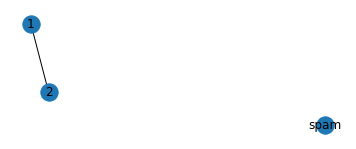

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.axes()
ax.set_axis_off()
ax.set_aspect(1)
nx.draw_networkx(g, ax=ax)

### Directed graphs, weighted graphs

You may create undirected (`Graph`) or directed (`DiGraph`) graphs. For convenience sake, you may feed an adjacency list directly when constructing the graph.

For a weighted graph, just add the corresponding parameter to the edge. The bracket notation returns an edge as a dictionary with all the parameters given at creation.

{'weight': 5}

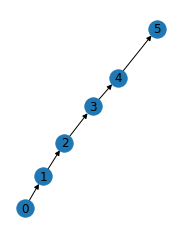

In [5]:
g = nx.DiGraph()

# create edges from an iterable
g.add_edges_from(
    zip([0, 1, 2, 3, 4],
        [1, 2, 3, 4, 5]),
    # you may add weights to edges just naturally
    weight=5,
)

ax = plt.axes()
ax.set_axis_off()
ax.set_aspect(1)
nx.draw_networkx(g, ax=ax)

g[0][1]

<div class="alert alert-warning">
    <b>Exercice:</b> Create the following graphs with <code>networkx</code>.
</div>

![graphs](img/graphs.png)

OutEdgeView([('A', 'C'), ('A', 'B'), ('C', 'G'), ('B', 'D'), ('B', 'E'), ('E', 'F')])

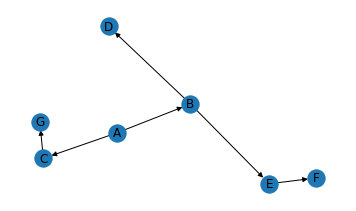

In [6]:
# Write your code here
g1 = nx.Graph()
g1.add_node('A')
g2 = nx.DiGraph()
g2.add_edges_from(
    zip(['A', 'A'], ['B','C'])
)
g3 = nx.DiGraph()
g3.add_edges_from(
    zip(['A'], ['B']),
    weight=3
)
g3.add_edges_from(
    zip(['A', 'C'], ['C', 'B']),
    weight=1
)
g4 = nx.DiGraph()
g4.add_edges_from(
    zip(['A', 'A', 'B', 'B', 'E', 'C'], 
        ['C', 'B', 'D', 'E', 'F', 'G'])
)

ax = plt.axes()
ax.set_axis_off()
ax.set_aspect(1)
nx.draw_networkx(g4, ax=ax)
g4.edges

OutEdgeView([('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'F'), ('C', 'A'), ('C', 'E'), ('C', 'F'), ('D', 'B'), ('E', 'A')])

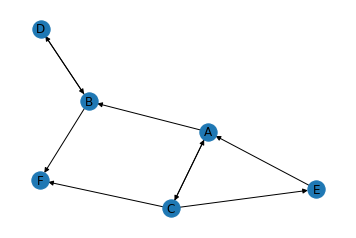

In [7]:
g = nx.DiGraph(
    # feed an adjacency list
    [
        ['A', 'A'], ['A', 'B'], ['A', 'C'],
        ['B', 'D'], ['B', 'F'],
        ['C', 'A'], ['C', 'E'], ['C', 'F'],
        ['D', 'B'],
        ['E', 'A'],
    ]
)

ax = plt.axes()
ax.set_axis_off()

# You may give a positioning strategy
nx.draw_networkx(g, ax=ax, pos=nx.kamada_kawai_layout(g))
g.edges


Graphs are provided with methods and properties that were defined in class.

In [8]:
# the adjacency list for the graph
g.adj

AdjacencyView({'A': {'A': {}, 'B': {}, 'C': {}}, 'B': {'D': {}, 'F': {}}, 'C': {'A': {}, 'E': {}, 'F': {}}, 'D': {'B': {}}, 'F': {}, 'E': {'A': {}}})

In [9]:
# the edges leaving from A
g['A']

AtlasView({'A': {}, 'B': {}, 'C': {}})

In [10]:
# the degree of node A
g.degree['A']

6

In [11]:
g.is_directed()

True

In [12]:
# you may create the undirected version of a directed graph
g_undirected = g.to_undirected()
# and compare the adjacency lists
g_undirected.adj

AdjacencyView({'A': {'A': {}, 'B': {}, 'C': {}, 'E': {}}, 'B': {'A': {}, 'D': {}, 'F': {}}, 'C': {'A': {}, 'E': {}, 'F': {}}, 'D': {'B': {}}, 'F': {'B': {}, 'C': {}}, 'E': {'C': {}, 'A': {}}})

## Shortest paths problems

The `networkx` library contains many graph algorithms implementations.

In [13]:
import pkgutil
list(module for _, module, is_package in pkgutil.iter_modules(nx.algorithms.__path__)
     if is_package)

['approximation',
 'assortativity',
 'bipartite',
 'centrality',
 'coloring',
 'community',
 'components',
 'connectivity',
 'flow',
 'isomorphism',
 'link_analysis',
 'node_classification',
 'operators',
 'shortest_paths',
 'tests',
 'traversal',
 'tree']

### Basic introduction to Dijkstra algorithm

We will focus in this session on shortest paths problems. Let us consider the following graph we studied in class.

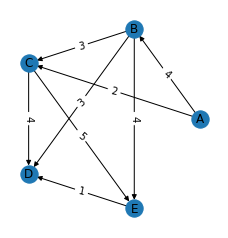

In [33]:
g = nx.DiGraph()

g.add_edge('A', 'B', weight=4)
g.add_edge('A', 'C', weight=2)
g.add_edge('B', 'C', weight=3)
g.add_edge('B', 'D', weight=3)
g.add_edge('B', 'E', weight=4)
g.add_edge('C', 'D', weight=4)
g.add_edge('C', 'E', weight=5)
g.add_edge('E', 'D', weight=1)

ax = plt.axes()

nx.draw_networkx(
    g, ax=ax,
    pos=nx.shell_layout(g)
)
nx.draw_networkx_edge_labels(
    g, ax=ax, pos=nx.shell_layout(g),
    edge_labels=dict(((u, v), g[u][v]['weight'])
                     for u, v in g.edges)
)

ax.set_aspect(1)
ax.set_axis_off()


<div class="alert alert-hint">
    <b>Dijkstra algorithm</b>: Time to recall the principle of the algorithm!
</div>

Dijkstra algorithm is provided in `networkx`; a more advanced interface is also available if we want to unroll the algorithm. Execute the following cells to see an animation of Dijkstra's algorithm on the previous graph.

In [34]:
from matplotlib import animation

def anim_to_html(anim):
    plt.close(anim._fig)
    return anim.to_html5_video()

animation.Animation._repr_html_ = anim_to_html

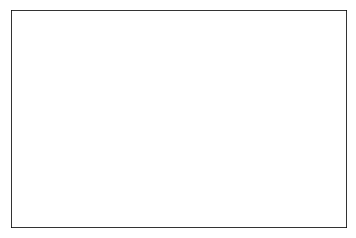

In [35]:
fig, ax = plt.subplots()
ax.set_axis_off()
ax.set_aspect(1)

nx.draw_networkx(
    g, ax=ax,
    pos=nx.shell_layout(g)
)

def animate(i):

    predecessors, _ = nx.shortest_paths.dijkstra_predecessor_and_distance(g, 'A', i)
    nx.draw_networkx_edges(
        g, ax=ax, pos=nx.shell_layout(g),
        edgelist=[(succ, pred)
                  for pred in predecessors.keys()
                  for succ in predecessors[pred]],
        edge_color='crimson',
        width=2
    )
    nx.draw_networkx_edge_labels(
        g, ax=ax, pos=nx.shell_layout(g),
        edge_labels=dict(((u, v), g[u][v]['weight'])
                         for u, v in g.edges)
    )
    return []

animation.FuncAnimation(fig, animate, frames=15,
                        interval=750, blit=True)


### A study case on the subway path finding problem

In this study case, we will be using the [RATP Open Data](https://data.ratp.fr/explore/dataset/offre-transport-de-la-ratp-format-gtfs/) service. You will find in the `data/` directory the `RATP_GTFS_LINES.zip` archive which can be found on the website.

The [GTFS format](https://en.wikipedia.org/wiki/General_Transit_Feed_Specification) is a format to communicate about transport services. Look at the `OffreDeTransport_GTFS_RATP.pdf` file in the `data/` directory to have explanations on how the data is structured.

The following script parses the archive and creates four dictionaries:

 - `stations` contains information about the stations (id, name, lat/lon positions);
 - `stop_times` contains train schedules for each station (stop_id, trip_id, arrival_time);
 - `trips` contains a one-to-n relationship between trips and routes (one trip_id per day, several trip_id for one route_id);
 - `transfers` contains minimum transfer times (walking time) from one station to another (more precisely)

Please note:

 - all dictionaries are indexed by the name of the line (`METRO_13`, `RER_B`);
 - the same station **may have several stop_id and several lat/lon coordinates**. The stop_id is associated to a subway platform rather than to a station building;
 - bus lines have been ignored in order to keep a map readable but the archive contains all you need to build your own pathfinding app with the full network information (you may want to also include [this](https://ressources.data.sncf.com/explore/dataset/sncf-transilien-gtfs/information/) or [this](https://data.toulouse-metropole.fr/explore/dataset/tisseo-gtfs/table/) information);
 - we use a [Lambert 93](https://fr.wikipedia.org/wiki/Projection_conique_conforme_de_Lambert#Projections_officielles_en_France_m%C3%A9tropolitaine) projection to convert lat/lon to x-y coordinates;
 - **you may use euclidean distance on x-y coordinates**.

<div class="alert alert-danger">
    <b>Warning:</b> The following looks long but all the work has been done for you. The real work starts after the first map of the subway network.
</div>

In [36]:
# You must execute this cell.
%run shortest_paths.py

<Figure size 432x288 with 0 Axes>

You may explore the four tables for metro line 1 as follows:

In [37]:
from IPython.display import display, HTML

display(HTML("<h4>Stations on METRO_1</h4>"))
display(stations['METRO_1'].head())

display(HTML("<h4>Stop times on METRO_1</h4>"))
display(stop_times['METRO_1'].head())

display(HTML("<h4>Trips on METRO_1</h4>"))
display(trips['METRO_1'].head())

display(HTML("<h4>Transfer times on METRO_1</h4>"))
display(transfers['METRO_1'].head())

stop_id  stop_code      stop_name  \
0     2371        NaN         Nation   
1     1832        NaN         Nation   
2     2170        NaN       Concorde   
3     2062        NaN       Bastille   
4     2331        NaN  Louvre-Rivoli   

                                          stop_desc   stop_lat  stop_lon  \
0  Terre-plein face au 3 place de la Nation - 75112  48.848111  2.398004   
1  Terre-plein face au 3 place de la Nation - 75112  48.848111  2.398004   
2                      Place de la Concorde - 75108  48.865678  2.321194   
3                        Rue de la Roquette - 75104  48.852976  2.369219   
4           Amiral de Coligny (8 rue de l') - 75101  48.860880  2.340973   

   location_type  parent_station  
0              0             NaN  
1              0             NaN  
2              0             NaN  
3              0             NaN  
4              0             NaN

trip_id arrival_time departure_time  stop_id  stop_sequence  \
0  10025335431078871     14:01:00       14:01:00     2035              1   
1  10025335431078871     14:03:00       14:03:00     2067              2   
2  10025335431078871     14:04:00       14:04:00     1725              3   
3  10025335431078871     14:06:00       14:06:00     1751              4   
4  10025335431078871     14:07:00       14:07:00     1832              5   

   stop_headsign  shape_dist_traveled  
0            NaN                  NaN  
1            NaN                  NaN  
2            NaN                  NaN  
3            NaN                  NaN  
4            NaN                  NaN

route_id  service_id            trip_id  trip_headsign  trip_short_name  \
0   1577980     2533543  10025335431078871            104              104   
1   1577980     2533545  10025335451078871            104              104   
2   1577980     2533546  10025335461078871            104              104   
3   1577980     2533548  10025335481078871            104              104   
4   1577980     2533549  10025335491078871            104              104   

   direction_id  shape_id  
0             0       NaN  
1             0       NaN  
2             0       NaN  
3             0       NaN  
4             0       NaN

from_stop_id  to_stop_id  transfer_type  min_transfer_time
0       4037246        2429              2                225
1       3765289        1751              2                252
2       7176243        1832              2                277
3       4996981        2062              2                209
4       4037177        2443              2                215

> Just for fun, before we get back to work, see how we can use the power of pandas data frames in order to get all the mission codes associated to RER B.
The first letter of the mission code is associated to the terminus station of the train
(*but this is useless for us now so **you may forget it** unless you are a nerd with transportation networks*)

In [19]:
index = 'RER_B'

(trips[index]
 # keep only one trip_id
 .drop_duplicates('trip_headsign')
 # get all station_id associated to a trip_id
 .merge(stop_times[index])
 # get the station names associated to the station_id
 .merge(stations[index])
 # be sure all stops come in order
 .sort_values('stop_sequence')
 # for each mission code
 .groupby('trip_headsign')
 # only keep the last station name on the route.
 [['stop_name']].last()
 # Reverse the table and
 .reset_index()
 # for each last station
 .groupby('stop_name')
 # put all mission codes into one string
 .apply(lambda df: ", ".join(df.trip_headsign))
 # finally, export to a Python dictionary to make it more readable
 .to_dict())

{'Aulnay-sous-Bois': 'GPZZ, GSZZ',
 'Aéroport Charles de Gaulle 2 TGV': 'EABU, EADU, EASI, EAST, EAZO, EBOI, EBON, EBRE, EBRI, ECAD, ECCI, ECCO, ECIL, ECLO, ECRU, EDAL, EDAR, EDDY, EDME, EELA, EETA, EEVE, EGRE, EINE, EJRE, EJTO, EKZZ, ELAN, ELBE, ELEC, ELET, ELIK, ELIR, ELOI, ELOT, EMAL, EMOI, ENNE, EPAC, EPAF, EPAU, EPAV, EPEE, EPEX, EPIN, EPIZ, EPLA, EPOC, EPOI, EPOL, EPON, EPOT, EPOU, EPOZ, EPUN, EPZZ, ERAI, ERAK, ERAN, ERAS, ERBE, ERDI, ERET, ERIC, ERIO, ERMA, EROC, ERRE, ERSE, ERTE, ERUI, ERUK, ERUP, ETOU, EVAL, EVOL, EZOS, EZUT',
 'Denfert-Rochereau': 'JADA, JALU, JAMI, JANO, JASO, JELU, JENO, JEPI, JOLE, JOLU, JONI, JOUL',
 'Gare du Nord': 'APZZ, ASZZ',
 'La Plaine-Stade de France': 'QADO, QAPO',
 'Laplace': 'ULMS, UPOI, USER',
 'Massy-Palaiseau': 'KABE, KAFE, KALE, KALI, KANE, KAPA, KAPE, KAPO, KARA, KARE, KARI, KASE, KASO, KATE, KAZZ, KFAI, KFAL, KFAR, KFAS, KFEL, KFON, KFOS, KFRE, KFTE, KFUR, KISS, KOBI, KOCQ, KODA, KOGO, KOIL, KOLA, KOME, KONI, KOOL, KPZZ, KUBE, KUBY, KUNE',

#### Data exploration

In order to get a better grasp on the data, let's look at line `METRO_13`:

 - the two direction ids;
 - the four different route_id because of the two branches to the North;
 - all stations in order for one trip_id.

In [38]:
trips['METRO_13'].drop_duplicates('trip_headsign')

route_id  service_id            trip_id  trip_headsign  trip_short_name  \
0      1197620     2533740  10025337400912413            101              101   
1105   1197620     2533742  10025337420912419            102              102   
3578   1197621     2533742  10025337421773432            103              103   
4982   1197621     2533750   1025337500912421            104              104   
5023   1197622     2533740  10025337400912416            201              201   
6128   1197622     2533742  10025337420912423            202              202   
8608   1197623     2533742  10025337420912424            203              203   

      direction_id  shape_id  
0                0       NaN  
1105             0       NaN  
3578             0       NaN  
4982             0       NaN  
5023             1       NaN  
6128             1       NaN  
8608             1       NaN

In [39]:
index = 'METRO_13'

(trips[index]
 # keep only one trip_id
 .head(1)
 # get all station_id associated to a trip_id
 .merge(stop_times[index])
 # get the station names associated to the station_id
 .merge(stations[index])
 # be sure all stops come in order
 .sort_values('stop_sequence')
 # filter information
 [['stop_id', 'stop_name', 'departure_time']]
)

stop_id                              stop_name departure_time
0      1969                    Châtillon Montrouge       19:38:00
1      1880             Malakoff-Rue Etienne Dolet       19:40:00
2      1879             Malakoff-Plateau de Vanves       19:41:00
3      1749                        Porte de Vanves       19:43:00
4      1799                              Plaisance       19:45:00
5      1787                                Pernety       19:46:00
6      1948                                  Gaîté       19:47:00
7      1827                 Montparnasse-Bienvenue       19:49:00
8      1928                                  Duroc       19:50:00
9      1719                  Saint-François-Xavier       19:51:00
10     1638                                Varenne       19:53:00
11     1897                              Invalides       19:54:00
12     2025              Champs-Elysées-Clémenceau       19:55:00
13     1820                             Miromesnil       19:57:00
14     1724                           Saint-Lazare       19:59:00
15     1858                                  Liège       20:01:00
16     1796                        Place de Clichy       20:02:00
17     1656                             La Fourche       20:03:00
18     2009                               Brochant       20:05:00
19     1741                        Porte de Clichy       20:07:00
20     1872                       Mairie de Clichy       20:08:00
21     1947                           Gabriel-Péri       20:11:00
22  1662795                           Les Agnettes       20:13:00
23  1662797  Asnières-Gennevilliers Les Courtilles       20:15:00

In [40]:
all_stations[['stop_name', 'line']].query("stop_name == 'Saint-Lazare'")

stop_name      line
stop_id                        
1723     Saint-Lazare  METRO_12
2468     Saint-Lazare  METRO_12
1724     Saint-Lazare  METRO_13
2469     Saint-Lazare  METRO_13
1166840  Saint-Lazare  METRO_14
1166841  Saint-Lazare  METRO_14
1722     Saint-Lazare   METRO_3
2467     Saint-Lazare   METRO_3

Since we don't want to play with `stop_id`, things can get complicated with capital letters, accentuated letters, hyphens and typos (don't get me started!), we provide a fuzzy search method.

`.` is a wildcard character, and you may need `$` to mark the end of the string.

Also, the variable `pos` contains all x-y coordinates for each station_id. Remember you may use euclidean distances.

In [41]:
search_station('Saint.Laz')

{1723: 'Saint-Lazare',
 2468: 'Saint-Lazare',
 1724: 'Saint-Lazare',
 2469: 'Saint-Lazare',
 1166840: 'Saint-Lazare',
 1166841: 'Saint-Lazare',
 1722: 'Saint-Lazare',
 2467: 'Saint-Lazare'}

In [42]:
{ # Nation also matches "Nationale"
    key: value
    for key, value in search_station('Nation').items()
    if value != 'Nation'
}

{1836: 'Nationale', 2303: 'Nationale'}

In [43]:
# Use the wildcard
search_station('Nation$')

{2371: 'Nation',
 1832: 'Nation',
 2338: 'Nation',
 1833: 'Nation',
 2339: 'Nation',
 1834: 'Nation',
 2531: 'Nation',
 1651: 'Nation',
 1835: 'Nation',
 2302: 'Nation'}

In [44]:
import numpy as np

i1, n1 = search_station('Nation$').popitem()
x1, y1 = pos[i1]
i2, n2 = search_station('Saint-Laz').popitem()
x2, y2 = pos[i2]

# in meters
d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

print(f"Distance between {n1} and {n2}: {d/1000:.2f} km")

Distance between Nation and Saint-Lazare: 5.98 km


#### Basic graph of the network

Now, we got all we need to build a first basic graph of the network.

You will need to fill the graph with more information later so **take the time to understand what happens here**:

In [46]:
# Paris RATP graph

g = nx.DiGraph()

# for each subway line
for line_nb, trip in trips.items():

    # for each different trip
    for trip_id in trip.drop_duplicates('route_id').trip_id:

        # Note:
        #   - we should use "trip_headsign" rather than "route_id"
        #     but the map gets confusing outside Paris
        #   - inside Paris, the graph we build here is still correct

        sequence = list(
            # get the list of stop_id in orders
            stop_times[line_nb]
            .query(f'trip_id == {trip_id}')
            .sort_values('stop_sequence')
            .stop_id
        )

        for first, second in zip(sequence[:-1], sequence[1:]):
            g.add_edge(
                first, second,
                # we store 'RER' or 'METRO' for printing it differently
                type=line_nb.split('_')[0],
                # line_colors is provided as is
                color=line_colors[line_nb]
            )

# for each subway line
for line_nb, transfer in transfers.items():

    # parse the lines of the table in order
    for _, line in transfer.iterrows():

        first, second = line.from_stop_id, line.to_stop_id

        # add an edge for each connection if both nodes already exists in the graph
        # (remember there are a lot of bus stations we chose to ignore)
        if first in g.nodes and second in g.nodes:
            g.add_edge(
                first, second,
                type='CONNECTION',
                duration=line.min_transfer_time,
                color='#aaaaaa'
            )
            g.add_edge(
                second, first,
                type='CONNECTION',
                duration=line.min_transfer_time,
                color='#aaaaaa'
            )

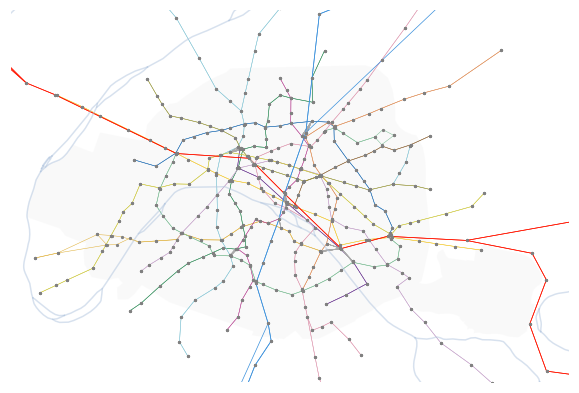

In [47]:
fig, ax = plt.subplots(
    1, 1, figsize=(10, 10),
)

# This function is provided together with the graph
plot_ratp(ax, g)

#### Exercices

<div class="alert alert-warning">
    Use Dijkstra's algorithm to find the shortest path between Félix Faure and Robespierre. Consider first that "shortest" means "with the least number of stations".
</div>

In [125]:
# Write your code for shortest path here. You should obtain a path with 17 stations.
rob = search_station('Robespierre') # {2449: 'Robespierre', 1704: 'Robespierre'}
felix = search_station('Félix Faure') # {3343752: 'Félix Faure', 3343746: 'Félix Faure'}
rob
felix
stru = zip(rob, felix)
a = list(stru)
a[0][0]
print(nx.shortest_paths.dijkstra_path_length(g, a[0][0], a[0][1]))
#print(nx.shortest_paths.dijkstra_path_length(g, 3343746, 1704))
a



17


[(2449, 3343752), (1704, 3343746)]

In [121]:
def shortest_path(g, source, target, method, **kwargs):
    """Finds the shortest path between source and target.

    Since many stations may match source and target, the method
    tries to all pairs and returns the shortest path.

    If errors are met, they are silenced unless no pair yields a
    shortest path.

    Returns a dictionary with various metrics and information
    useful for future explanations.

    """

    best_eval = np.inf
    best_result = None
    latest_exception = None

    for source_ in search_station(source):
        for target_ in search_station(target):
            try:
                with StatsPatch(g) as stats:
                    cur_attempt = method(
                        g, source=source_, target=target_,
                        **kwargs)
                    cur_eval = sum(
                        g[u][v].get(kwargs.get('weight', None), 1)
                        for u, v in zip(cur_attempt[:-1], cur_attempt[1:])
                    )
                    if cur_eval >= best_eval:
                        continue
                    best_eval = cur_eval
                    best_result = cur_attempt
                    best_stats = stats

            except nx.NetworkXNoPath as e:
                latest_exception = e

    if best_result is None:
        if latest_exception is not None:
            raise latest_exception
        return None

    return {
        'weight': best_eval,
        'path': [Station(id_) for id_ in best_result],
        'counter': best_stats.counter,
        'stats': best_stats
    }


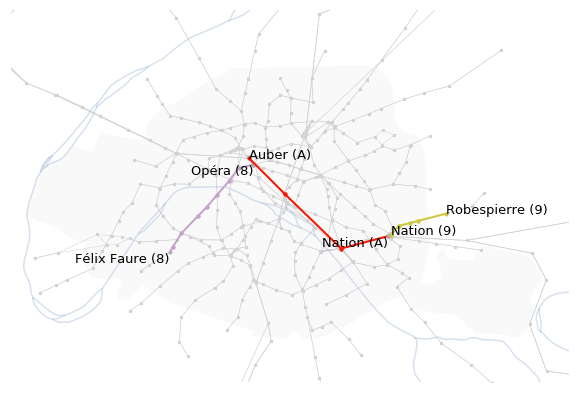

In [126]:
# This visualization code should only be used with the solution provided above.
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plot_ratp(ax, g, color='lightgrey')

plot_path(
    ax, g, shortest_path(
        g, 'Félix Faure', 'Robespierre',
        nx.shortest_paths.dijkstra_path
    )
)

<div class="alert alert-warning">
    Modify the graph definition to add the distance information and use Dijkstra's algorithm with distance as cost.
</div>

In [127]:
# Paris RATP graph definition
# Add now the distance information

g = nx.DiGraph()

# for each subway line
for line_nb, trip in trips.items():

    # for each different trip
    for trip_id in trip.drop_duplicates('route_id').trip_id:

        # Note:
        #   - we should use "trip_headsign" rather than "route_id"
        #     but the map gets confusing outside Paris
        #   - inside Paris, the graph we build here is still correct

        sequence = list(
            # get the list of stop_id in orders
            stop_times[line_nb]
            .query(f'trip_id == {trip_id}')
            .sort_values('stop_sequence')
            .stop_id
        )

        for first, second in zip(sequence[:-1], sequence[1:]):
            g.add_edge(
                first, second,
                # we store 'RER' or 'METRO' for printing it differently
                type=line_nb.split('_')[0],
                # line_colors is provided as is
                color=line_colors[line_nb]
            )

# for each subway line
for line_nb, transfer in transfers.items():

    # parse the lines of the table in order
    for _, line in transfer.iterrows():

        first, second = line.from_stop_id, line.to_stop_id

        # add an edge for each connection if both nodes already exists in the graph
        # (remember there are a lot of bus stations we chose to ignore)
        if first in g.nodes and second in g.nodes:
            g.add_edge(
                first, second,
                type='CONNECTION',
                duration=line.min_transfer_time,
                color='#aaaaaa'
            )
            g.add_edge(
                second, first,
                type='CONNECTION',
                duration=line.min_transfer_time,
                color='#aaaaaa'
            )

In [131]:
def distance(i1, i2):
    x1, y1 = pos[i1]
    x2, y2 = pos[i2]
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

g = nx.DiGraph()

# for each subway line
for line_nb, trip in trips.items():

    # for each different trip
    for trip_id in trip.drop_duplicates('route_id').trip_id:

        # Note:
        #   - we should use "trip_headsign" rather than "route_id"
        #     but the map gets confusing outside Paris
        #   - inside Paris, the graph we build here is still correct

        sequence = list(
            # get the list of stop_id in orders
            stop_times[line_nb]
            .query(f'trip_id == {trip_id}')
            .sort_values('stop_sequence')
            .stop_id
        )

        for first, second in zip(sequence[:-1], sequence[1:]):
            g.add_edge(
                first, second,
                # we store 'RER' or 'METRO' for printing it differently
                type=line_nb.split('_')[0],
                # add distance information
                distance=distance(first, second),
                # line_colors is provided as is
                color=line_colors[line_nb]
            )

# for each subway line
for line_nb, transfer in transfers.items():

    # parse the lines of the table in order
    for _, line in transfer.iterrows():

        first, second = line.from_stop_id, line.to_stop_id

        # add an edge for each connection if both nodes already exists in the
        # graph (remember there are a lot of bus stations we chose to ignore)
        if first in g.nodes and second in g.nodes:
            g.add_edge(
                first, second,
                type='CONNECTION',
                distance=distance(first, second),
                duration=line.min_transfer_time,
                color='#aaaaaa'
            )
            g.add_edge(
                second, first,
                type='CONNECTION',
                distance=distance(first, second),
                duration=line.min_transfer_time,
                color='#aaaaaa'
            )



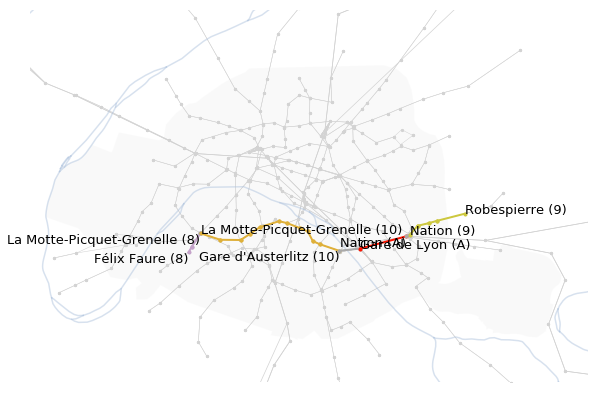

In [132]:
# Plot the solution for Dijkstra's algorithm with distance

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plot_ratp(ax, g, color='lightgrey')
plot_path(
    ax, g, shortest_path(
        g, 'Félix Faure', 'Robespierre',
        nx.shortest_paths.dijkstra_path,
        weight='distance'
    )
)

<div class="alert alert-warning">
  Use the A* algorithm to find the shortest path between Félix Faure and Robespierre. Read the documentation to find how to implement your heuristic. You should obtain the same shortest path.
</div>

<div class="alert alert-warning">
  Is A* algorithm faster than Dijkstra algorithm here?
</div>

In [138]:
%%timeit
shortest_path(
    g, 'Félix Faure', 'Robespierre',
    nx.shortest_paths.dijkstra_path,
    weight='distance'
)

23.1 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [139]:
%%timeit
shortest_path(
    g, 'Félix Faure', 'Robespierre',
    nx.shortest_paths.astar_path,
    weight='distance',
    heuristic=distance
)

29.2 ms ± 804 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [135]:
astar = shortest_path(
    g, 'Félix Faure', 'Robespierre',
    nx.shortest_paths.astar_path,
    weight='distance',
    heuristic=distance,
)

dijkstra = shortest_path(
    g, 'Félix Faure', 'Robespierre',
    # A* without heuristic is equivalent to Dijkstra
    nx.shortest_paths.astar_path,
    weight='distance',
)

# of course the result is the same!
astar['weight'], dijkstra['weight']

(10826.222635512424, 10826.222635512424)

In [136]:
# Number of nodes explored
astar['counter'], dijkstra['counter']

(127, 664)

In [137]:
# An animation to watch the evolution of both algorithms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

plot_ratp(ax1, g, color='lightgrey')
plot_ratp(ax2, g, color='lightgrey')

ax1.set_title("Dijkstra algorithm", fontsize=15)
ax2.set_title("A* algorithm", fontsize=15)

def animate():
    dijkstra_animate = animate_path(ax1, dijkstra)
    astar_animate = animate_path(ax2, astar)

    def animate_both(i):
        return dijkstra_animate(i) + astar_animate(i)

    return animate_both

animation.FuncAnimation(
    fig, animate(),
    frames=150, interval=100, blit=True
)

<div class="alert alert-warning">
    Find the ***fastest*** path between Félix Faure and Robespierre. Can we use A\* here?
    <p>
    Keep the heuristic for distances and use A* algorithm anyway. Analyse the result.
</div>

In [140]:
# Write your code here. You have to modify the graph definition to add a duration attribute.

g = nx.DiGraph()

# for each subway line
for line_nb, trip in trips.items():

    # for each different trip
    for trip_id in trip.drop_duplicates('route_id').trip_id:

        # Note:
        #   - we should use "trip_headsign" rather than "route_id"
        #     but the map gets confusing outside Paris
        #   - inside Paris, the graph we build here is still correct

        sequence = list(
            # get the list of stop_id in orders
            stop_times[line_nb]
            .query(f'trip_id == {trip_id}')
            .sort_values('stop_sequence')
            .stop_id
        )

        for first, second in zip(sequence[:-1], sequence[1:]):
            g.add_edge(
                first, second,
                # we store 'RER' or 'METRO' for printing it differently
                type=line_nb.split('_')[0],
                # line_colors is provided as is
                color=line_colors[line_nb]
            )

# for each subway line
for line_nb, transfer in transfers.items():

    # parse the lines of the table in order
    for _, line in transfer.iterrows():

        first, second = line.from_stop_id, line.to_stop_id

        # add an edge for each connection if both nodes already exists in the graph
        # (remember there are a lot of bus stations we chose to ignore)
        if first in g.nodes and second in g.nodes:
            g.add_edge(
                first, second,
                type='CONNECTION',
                duration=line.min_transfer_time,
                color='#aaaaaa'
            )
            g.add_edge(
                second, first,
                type='CONNECTION',
                duration=line.min_transfer_time,
                color='#aaaaaa'
            )

In [141]:
# Run both algorithms and print paths lengths.

dijkstra = shortest_path(
    g, 'Félix Faure', 'Robespierre',
    nx.shortest_paths.dijkstra_path,
    weight='duration'
)

astar = shortest_path(
    g, 'Félix Faure', 'Robespierre',
    nx.shortest_paths.astar_path,
    weight='duration',
    heuristic=distance
)

# With a wrong heuristic, A* gives nonsense
astar['weight'], dijkstra['weight']

(409, 203)

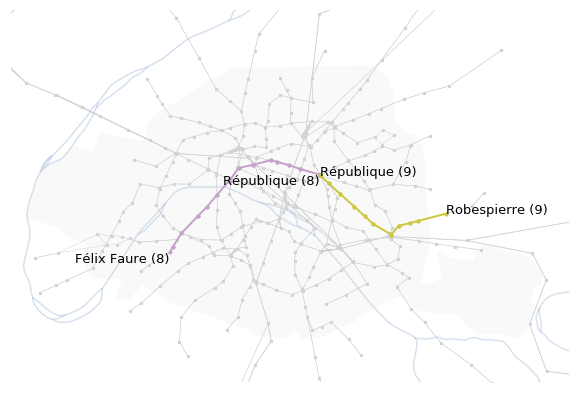

In [142]:
# Display the path found by Dijsktra's algorithm with durations

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plot_ratp(ax, g, color='lightgrey')
plot_path(ax, g, dijkstra)

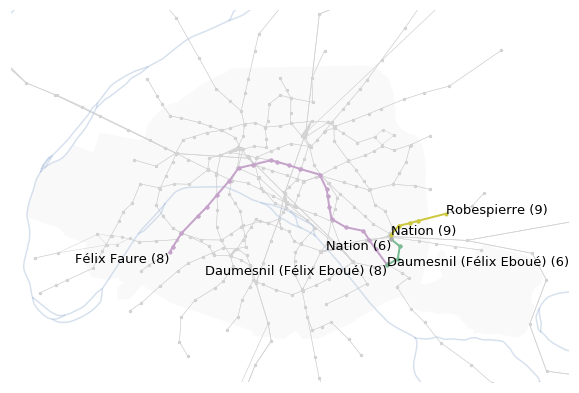

In [143]:
# Display the path found by A* algorithm with durations

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plot_ratp(ax, g, color='lightgrey')
plot_path(ax, g, astar)

<div class="alert alert-warning">
  How would you compute the fastest path between Félix Faure and Robespierre considering you want to leave "now"?
  The issue here is to take the waiting time into account.
</div>

In [ ]:
# Write your code here